## Final Project Submission

Please fill out:
* Student name: Steven Rosa
* Student pace: part time
* Project review date/time: Monday 1 April 2019 11am ET
* Instructor name: Jeff Herman
* Blog post URL:


"Database for The Scratched Voices Begging to be Heard: The Graffiti of Pompeii and Today"

by Alexa Rose

https://core.tdar.org/dataset/445837/database-for-the-scratched-voices-begging-to-be-heard-the-graffiti-of-pompeii-and-today

<a id = 'top'></a>

# Contents
- Libraries and helper functions
- [A first look at the data](#obtain)
- [Cleaning the raw data](#scrub)
- [Exploratory data analysis](#explore)
- Modeling
 - [Model \#1](#model1)
 - [Model \#2](#model2)
 - [Model \#3](#model3)
- [Conclusions](#concl)

# Libraries and helper functions

In [1]:
import pandas as pd #For working with DataFrames
import matplotlib.pyplot as plt #For visualizing plots

In [2]:
import time

In [3]:
#Function to draw in-line histograms
def inline_hists(xs, data, bins = 50):
    fig, axs = plt.subplots(1, len(xs), sharey=False, figsize=((5 * len(xs), 4)))
    for i, x in enumerate(xs):
        data[x].hist(ax=axs[i], label=x, xlabelsize=5, bins=bins)
        axs[i].legend()
    plt.show()

<a id = 'obtain'></a>

[(Back to top)](#top)

# A first look at the data

In [91]:
#Obtain the raw data
df_raw = pd.read_csv('graffiti.csv')

In [10]:
df_raw.head(10)

,CIL IV #,Reggio,Insula,Entrance,found?,In English,org.,Literacy (1-3),In org. language,Context type specific,...,Category,Written by,Work,Meter,Repetition,Foreign language,Image,Flohr Score,Socio-economic status,comments
0,8426,2,1,NaN,NaN,"By the holy gods of the house, I ask you to…",?,3.0,(per) lares sanctos rogo te vt,altar,...,Religious,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN
1,10256c,2,1,11,NaN,UXBUCTDSERFOGPHOFMKNL,?,2.0,VXBVCTDSERFOGPHOFMKNL,column,...,Civic,NaN,NaN,NaN,NaN,NaN,NaN,23.77,medium,NaN
2,10093c,2,1,10,NaN,Brutus is a dog,?,2.0,Brv(t)vs canis est,entrance,...,Insult/Threat,NaN,NaN,NaN,NaN,NaN,NaN,8.74,low,NaN
3,10086a,2,1,10,NaN,Of arms and a man…,?,3.0,Arma virvmqve,entrance,...,Reference,Virgil,Aeneid,"Metrical, quote",NaN,NaN,NaN,8.74,low,NaN
4,10082b,2,1,10,NaN,"Saggita, the emperor's slave, the little Pompeian",Benefiel 2010a,2.0,Sagitta imperatoris servos pompeianolvs,entrance,...,Tagging,NaN,NaN,NaN,NaN,NaN,NaN,8.74,low,NaN
5,10079,2,1,6,NaN,Maximus (greets) his Irene,?,2.0,Maxim(vs) irenae sve,façade,...,Social,NaN,NaN,NaN,NaN,NaN,NaN,3.37,low,NaN
6,8480,2,1,4/5/,NaN,Arrunitis was here with Tiburtinus,?,3.0,Arrvntivs hic fvit cvm tibvrtino,façade,...,Sexual,NaN,NaN,NaN,NaN,NaN,NaN,3.44-4.52,low,NaN
7,10088b,2,1,10,NaN,It's raining,?,2.0,Plvi,garden,...,Civic,NaN,NaN,NaN,NaN,NaN,NaN,8.74,low,NaN
8,10090,2,1,10,NaN,"Petronius, you fuck Pyramus",?,2.0,ΠΕΤΡΩΝΙ ΠΥΡΑΜΟ ΠΗΔΙΚΑΣ,garden,...,Sexual,NaN,NaN,NaN,NaN,NaN,NaN,8.74,low,NaN
9,10096b,2,1,11,NaN,All fell silent…,Milnor 2009 314,3.0,Conticvre om(nes),outer wall,...,Reference,Virgil,Aeneid,"Metrical, quote",NaN,NaN,NaN,23.77,medium,NaN


In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 22 columns):
CIL IV #                 1024 non-null object
Reggio                   994 non-null object
Insula                   989 non-null object
Entrance                 913 non-null object
found?                   17 non-null object
In English               1051 non-null object
org.                     279 non-null object
Literacy (1-3)           1038 non-null float64
In org. language         315 non-null object
Context type specific    705 non-null object
Context type general     751 non-null object
Famous House             503 non-null object
Category                 1027 non-null object
Written by               104 non-null object
Work                     62 non-null object
Meter                    143 non-null object
Repetition               81 non-null object
Foreign language         27 non-null object
Image                    56 non-null object
Flohr Score              582 non-null 

Columns to drop:

'found'
'org'?
'comments'?

Change 'Literacy' to integer before categorizing. Rename column.

Rename 'Image ' as 'Image'.

Categorical variables to transform: Reggio, Insula, Literacy, Context type specific, Context type general, Famous House (?), Socio-economic status


Null values to fill: Reggio, Insula, Entrance, Context type specific, Context type general, Famous House,

Target: 'Category'

In [13]:
#inline_hists(['Reggio', 'Insula', 'Entrance'], df)

In [14]:
#df['Reggio'].hist()

In [12]:
df_raw['Reggio'].value_counts()

7      224
9      148
1      138
6      131
8      120
5      104
2       89
3       37
4        2
6_7      1
Name: Reggio, dtype: int64

In [32]:
df_raw['Reggio'].isna().sum()

57

In [11]:
Reggio = df_raw['Reggio'].fillna(0)

In [14]:
Reggio = Reggio.astype(int)

In [17]:
Reggio.value_counts()

7     224
9     148
1     138
6     131
8     120
5     104
2      89
0      57
3      37
4       2
67      1
Name: Reggio, dtype: int64

In [28]:
Reggio[Reggio == 67]

994    67
Name: Reggio, dtype: int64

In [32]:
Reggio = Reggio.drop([994])

In [33]:
Reggio.value_counts()

7    224
9    148
1    138
6    131
8    120
5    104
2     89
0     57
3     37
4      2
Name: Reggio, dtype: int64

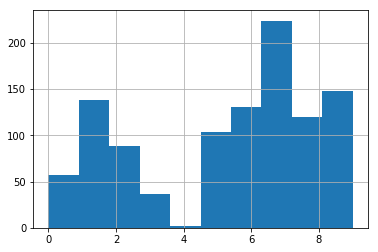

In [34]:
#There we go
Reggio.hist()

In [36]:
df_raw['Category'].value_counts()


Social                245
Sexual                200
Insult                132
Civic                  85
Reference              74
Religious              61
Tagging                59
Romantic               59
Violence               37
Insult/Sexual          20
Political              14
Insult/Social           9
Insult/Threat           5
Political/Social        5
Romantic/Sexual         3
Tagging/Violence        3
Sexual/Social           3
Romantic/Social         2
Religious/Romantic      2
Sexual/Violence         1
Political/Sexual        1
Political               1
Reference/Tagging       1
Political/Violence      1
Religious/Violence      1
Political/Tagging       1
Civic/Political         1
Insult/Tagging          1
Name: Category, dtype: int64

In [78]:
#Consider reclassifying all with 'beware' into a 'Warning' category
#Change all "Insult/Threat" to just 'Insult'
#Change all 'Political/Social' to just 'Political'
#Change all Romantic/Sexual' to just 'Romantic'
#Tagging/violence are just military things
#Sexual/social are ??
#Romantic/social are ??
#
df_raw[df_raw['Category'] == 'Religious/Romantic']




,CIL IV #,Reggio,Insula,Entrance,found?,In English,org.,Literacy (1-3),In org. language,Context type specific,...,Category,Written by,Work,Meter,Repetition,Foreign language,Image,Flohr Score,Socio-economic status,comments
213,4200,5,2,i,NaN,Whoever loves me: come. To Venus' loins I want...,NaN,2.0,NaN,peristyle,...,Religious/Romantic,NaN,NaN,NaN,NaN,NaN,NaN,53.05,high,NaN
574,2457,8,7,21,NaN,"Methe, slave of Cominia and actors of Atellan ...",NaN,3.0,NaN,NaN,...,Religious/Romantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium,NaN


In [13]:
df_raw['In English'] = df_raw['In English'].fillna('')


In [14]:
df_raw[df_raw['In English'].str.contains('gods')]

,CIL IV #,Reggio,Insula,Entrance,found?,In English,org.,Literacy (1-3),In org. language,Context type specific,...,Category,Written by,Work,Meter,Repetition,Foreign language,Image,Flohr Score,Socio-economic status,comments
0,8426,2,1,NaN,NaN,"By the holy gods of the house, I ask you to…",?,3.0,(per) lares sanctos rogo te vt,altar,...,Religious,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN
33,1227,6,1,7,NaN,"We came here desiring, much more [we desire to...",Benefiel 2010a,3.0,NaN,peristyle,...,Religious,NaN,NaN,NaN,metrical [distich],NaN,NaN,52.54,high,possible original variant
233,1679,7,2,45,maybe,"Undefeated Castrensis, may the gods be favoura...",NaN,3.0,NaN,atrium,...,Social,NaN,NaN,NaN,NaN,NaN,NaN,1.32,low,NaN
319,9887,2,4,13,NaN,Felix makes a vow to the household gods,Cooley/Cooley 2014 150,3.0,Felix (…) laribvs conse(crat) votvm,kitchen,...,Religious,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN
357,8873,3,5,1,NaN,I deny all gods! (...),"Biville 2003, 221",2.0,Homnes nego deos,outer wall,...,Religious,NaN,"Reference to muscial instruments, giraffe in i...",NaN,NaN,NaN,NaN,NaN,high,NaN
590,5370,9,7,20,NaN,"Whoever despises life, will easily feel contem...",NaN,3.0,NaN,peristyle,...,Religious,NaN,NaN,NaN,NaN,NaN,NaN,25,medium,NaN
673,8282,1,10,3,NaN,Household gods of Augustus…,Benefiel 2010a,2.0,Lares Avgvstos,entrance,...,Religious,NaN,NaN,NaN,NaN,NaN,NaN,7.87,low,NaN


<a id = 'scrub'></a>

[(Back to top)](#top)

# Cleaning the data

## Column by column

### 'Reggio'

In [61]:
df_raw['Reggio'].value_counts()

7    224
9    148
1    138
6    132
8    120
5    104
2     89
3     37
4      2
Name: Reggio, dtype: int64

In [45]:
print(df_raw['Reggio'].isna().sum())

57


In [92]:
df_raw['Reggio'] = df_raw['Reggio'].fillna(0)

In [93]:
#What's with the one 6_7 value?
df_raw[df_raw['Reggio'] == '6_7']

,CIL IV #,Reggio,Insula,Entrance,found?,In English,org.,Literacy (1-3),In org. language,Context type specific,...,Category,Written by,Work,Meter,Repetition,Foreign language,Image,Flohr Score,Socio-economic status,comments
994,346,6_7,NaN,NaN,NaN,Marcus Cerrinius (Vatia) as aedile! One loves ...,NaN,3.0,NaN,NaN,...,Romantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#Change 6_7 to 6
df_raw.at[994, 'Reggio'] = '6'

In [95]:
df_raw['Reggio'] = df_raw['Reggio'].astype(int)

Zero values can be filled later once more is known about the reggios.

### 'Insula'

In [77]:
df_raw['Insula'].value_counts()

1        154
7        124
2        115
12        88
6         66
5         57
9         46
15        44
4         43
10        42
11        41
3         37
13        35
16        35
14        32
8         22
4_5        2
4_3        2
9_10       1
8b         1
12_13      1
1_5        1
Name: Insula, dtype: int64

In [78]:
df_raw['Insula'].value_counts().sum()

989

In [79]:
df_raw['Insula'].isna().sum()

62

In [96]:
df_raw['Insula'] = df_raw['Insula'].fillna(0)

In [106]:
#Replace the values with underscores
df_raw.at[985, 'Insula'] = '4'
df_raw.at[986, 'Insula'] = '4'
df_raw.at[983, 'Insula'] = '4'
df_raw.at[984, 'Insula'] = '4'
df_raw.at[988, 'Insula'] = '9'
df_raw.at[987, 'Insula'] = '8'
df_raw.at[982, 'Insula'] = '12'
df_raw.at[981, 'Insula'] = '1'

In [107]:
df_raw['Insula'].value_counts()

1     155
7     124
2     115
12     89
6      66
0      62
5      57
9      47
4      47
15     44
10     42
11     41
3      37
13     35
16     35
14     32
8      23
Name: Insula, dtype: int64

In [108]:
df_raw['Insula'] = df_raw['Insula'].astype(int)

### 'Entrance'

In [112]:
#What is the entrance column?
df_raw['Entrance'].value_counts()

1         127
3          79
18_20      63
4          51
20         37
6          32
5          32
2          30
10         30
17         27
19         25
11         23
7          22
2_5        20
15         19
22_29      17
8          17
i          14
26         13
12         12
3_6        12
16         12
35         11
43         11
21         11
3_4         9
18          9
9           8
40          5
g           5
         ... 
f           1
57          1
34_35       1
41          1
25_26       1
36          1
26_27       1
9_7         1
14_15       1
23-26       1
e           1
4-Feb       1
18_19       1
51          1
39          1
7_8         1
9-Jan       1
8-Jul       1
23_24       1
5_7         1
F           1
27-35       1
16-17       1
4/5/        1
41_42       1
37          1
16-Jan      1
22-25       1
14_16       1
15-Jan      1
Name: Entrance, Length: 109, dtype: int64

In [110]:
df_raw[df_raw['Entrance'] == '18_20']

,CIL IV #,Reggio,Insula,Entrance,found?,In English,org.,Literacy (1-3),In org. language,Context type specific,...,Category,Written by,Work,Meter,Repetition,Foreign language,Image,Flohr Score,Socio-economic status,comments
768,2258,7,12,18_20,NaN,"Africanus is dying. A boy writes this, Rusticu...",NaN,3.0,NaN,NaN,...,Social,NaN,NaN,NaN,NaN,NaN,NaN,5.59,low,NaN
769,2274,7,12,18_20,NaN,"All the best to you, because you fuck well",NaN,2.0,NaN,NaN,...,Sexual,NaN,NaN,NaN,NaN,NaN,NaN,5.59,low,NaN
770,2197,7,12,18_20,NaN,"Aplonia…, Nonius gives a good fuck.",NaN,2.0,NaN,NaN,...,Sexual,NaN,NaN,NaN,NaN,NaN,NaN,5.59,low,NaN
771,2193,7,12,18_20,NaN,"Arphocras,together with Druaca, has had a good...",NaN,3.0,NaN,NaN,...,Sexual,NaN,NaN,NaN,NaN,NaN,NaN,5.59,low,NaN
772,2198,7,12,18_20,NaN,"Beronice (here) available, to fuck",NaN,2.0,NaN,NaN,...,Sexual,NaN,NaN,NaN,NaN,NaN,NaN,5.59,low,NaN
773,2180,7,12,18_20,NaN,Bravo Castrensis! Bye!,NaN,2.0,NaN,NaN,...,Social,NaN,NaN,NaN,NaN,NaN,NaN,5.59,low,NaN
774,2179,7,12,18_20,yes,Bravo Paris,NaN,2.0,NaN,NaN,...,Social,NaN,NaN,NaN,NaN,NaN,NaN,5.59,low,NaN
775,2206,7,12,18_20,NaN,"Bye, Callidromus!",NaN,2.0,NaN,NaN,...,Social,NaN,NaN,NaN,NaN,NaN,NaN,5.59,low,NaN
776,2212,7,12,18_20,NaN,"Bye, victorious Victoria!",NaN,2.0,NaN,NaN,...,Social,NaN,NaN,NaN,NaN,NaN,NaN,5.59,low,NaN
777,2279,7,12,18_20,NaN,Costs 2 asses,NaN,2.0,NaN,NaN,...,Sexual,NaN,NaN,NaN,NaN,NaN,NaN,5.59,low,NaN


In [111]:
#Reggio 7 Insula 12 had a brothel at entrances 18 through 20. Will change these values to 19.
df_raw.replace('18_20', '19')

,CIL IV #,Reggio,Insula,Entrance,found?,In English,org.,Literacy (1-3),In org. language,Context type specific,...,Category,Written by,Work,Meter,Repetition,Foreign language,Image,Flohr Score,Socio-economic status,comments
0,8426,2,1,NaN,NaN,"By the holy gods of the house, I ask you to…",?,3.0,(per) lares sanctos rogo te vt,altar,...,Religious,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN
1,10256c,2,1,11,NaN,UXBUCTDSERFOGPHOFMKNL,?,2.0,VXBVCTDSERFOGPHOFMKNL,column,...,Civic,NaN,NaN,NaN,NaN,NaN,NaN,23.77,medium,NaN
2,10093c,2,1,10,NaN,Brutus is a dog,?,2.0,Brv(t)vs canis est,entrance,...,Insult/Threat,NaN,NaN,NaN,NaN,NaN,NaN,8.74,low,NaN
3,10086a,2,1,10,NaN,Of arms and a man…,?,3.0,Arma virvmqve,entrance,...,Reference,Virgil,Aeneid,"Metrical, quote",NaN,NaN,NaN,8.74,low,NaN
4,10082b,2,1,10,NaN,"Saggita, the emperor's slave, the little Pompeian",Benefiel 2010a,2.0,Sagitta imperatoris servos pompeianolvs,entrance,...,Tagging,NaN,NaN,NaN,NaN,NaN,NaN,8.74,low,NaN
5,10079,2,1,6,NaN,Maximus (greets) his Irene,?,2.0,Maxim(vs) irenae sve,façade,...,Social,NaN,NaN,NaN,NaN,NaN,NaN,3.37,low,NaN
6,8480,2,1,4/5/,NaN,Arrunitis was here with Tiburtinus,?,3.0,Arrvntivs hic fvit cvm tibvrtino,façade,...,Sexual,NaN,NaN,NaN,NaN,NaN,NaN,3.44-4.52,low,NaN
7,10088b,2,1,10,NaN,It's raining,?,2.0,Plvi,garden,...,Civic,NaN,NaN,NaN,NaN,NaN,NaN,8.74,low,NaN
8,10090,2,1,10,NaN,"Petronius, you fuck Pyramus",?,2.0,ΠΕΤΡΩΝΙ ΠΥΡΑΜΟ ΠΗΔΙΚΑΣ,garden,...,Sexual,NaN,NaN,NaN,NaN,NaN,NaN,8.74,low,NaN
9,10096b,2,1,11,NaN,All fell silent…,Milnor 2009 314,3.0,Conticvre om(nes),outer wall,...,Reference,Virgil,Aeneid,"Metrical, quote",NaN,NaN,NaN,23.77,medium,NaN


# RESUME HERE. A lot of mixed entrance values. May have to build a loop to cut off values after underscore and after dash.

### 'found?'

In [ ]:
df_raw.drop(['found?'], axis = 1, inplace = True)

### 'In English'

### 'org?'

### 'Literacy'

In [28]:
df_raw['Literacy'].value_counts()

2.0    592
3.0    444
1.0      2
Name: Literacy, dtype: int64

In [29]:
df_raw['Literacy'].isna().sum()

13

### 'In org. language'

### 'Context type specific' and 'Context type general'

### 'Famous House'

### Target: 'Category'

### 'Written by'

### 'Work', 'Meter', and 'Reptition'

### 'Foreign language'

### 'Image'

In [ ]:
df_raw['Image '].value_counts()

### 'Flohr Score'

### 'Socio-economic status'

### 'Comments'

In [36]:
df_raw.columns

Index(['CIL IV #', 'Reggio', 'Insula', 'Entrance', 'found?', 'In English',
       'org. ', 'Literacy', 'In org. language', 'Context type specific',
       'Context type general', 'Famous House', 'Category', 'Written by',
       'Work', 'Meter', 'Repetition', 'Foreign language', 'Image',
       'Flohr Score', 'Socio-economic status', 'comments'],
      dtype='object')

### Dropping columns

### Renaming columns

In [21]:
#df.rename(index=str, columns={"A": "a", "B": "c"})
df_raw = df_raw.rename(index=str, columns = {'Literacy (1-3)': 'Literacy',
                                    'Image ': 'Image'
                                   })

<a id = 'explore'></a>

[(Back to top)](#top)

# Exploratory data analysis

What is a reggio?

What is an insula?

From https://sites.google.com/site/ad79eruption/pompeii/map-of-pompeii

"Pompeii, however, has an additional level of numbering. It has been divided firstly into 9 regions (Regio), numbered in Roman numerals. Each of these regions contains several Insulae which are numbered 1, 2 3, etc. As with Herculaneum, each building within an insula has its own entrance number, again numbered 1, 2, 3 etc. For example, the House of Trebius Valens is labelled (Reg III, Ins 2, 1)."

<a id = 'model1'></a>

[(Back to top)](#top)

# Modeling: Model \#1

<a id = 'model2'></a>

[(Back to top)](#top)

# Model \#2

<a id = 'model3'></a>

[(Back to top)](#top)

# Model \#3

<a id = 'concl'></a>

[(Back to top)](#top)

# Conclusions